In [1]:
# xmlrpc_client.ipynb

# import xmlrpclib
import xmlrpc.client as xmlrpclib
import pickle
import pandas as pd

server = xmlrpclib.ServerProxy("http://localhost:8008")

print('Ping:', server.ping())

print('Server datetime:', server.now())

print('View, type, value:', server.type(2))
print('View, type, value:', server.type(2.))
print('View, type, value:', server.type('My string'))
print('View, type, value:', server.type("My string"))
print('View, type, value:', server.type([1,2,3]))
print('View, type, value:', server.type(["one", "two", "three"]))
print('View, type, value:', server.type((1,2,"3")))

print('Sum 2 + 3 :', server.sum(2, 3))
print('Pow 2^3: ', server.pow(2, 3))

Ping: True
Server datetime: 20250907T12:53:26
View, type, value: ['2', "<class 'int'>", 2]
View, type, value: ['2.0', "<class 'float'>", 2.0]
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['[1, 2, 3]', "<class 'list'>", [1, 2, 3]]
View, type, value: ["['one', 'two', 'three']", "<class 'list'>", ['one', 'two', 'three']]
View, type, value: ["[1, 2, '3']", "<class 'list'>", [1, 2, '3']]
Sum 2 + 3 : 5
Pow 2^3:  8


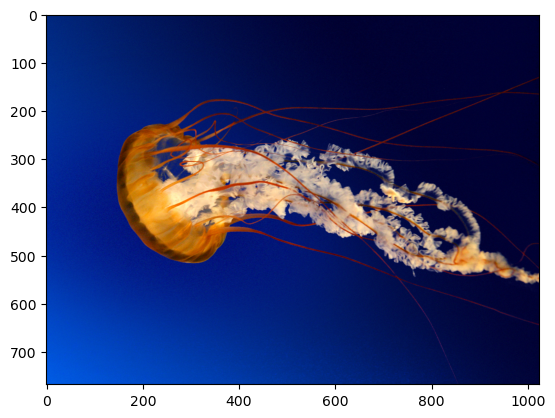

In [2]:
from PIL import Image # Работа с изображением
# from pylab import * # Отображение
import matplotlib.pyplot as plt
# import xmlrpclib

# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open('Jellyfish.jpg')

# img_arr = array(img)
img_arr = plt.imread('Jellyfish.jpg')

# Исходное изображение
# imshow(img_arr)

plt.imshow(img_arr)
plt.show()

Ping: True


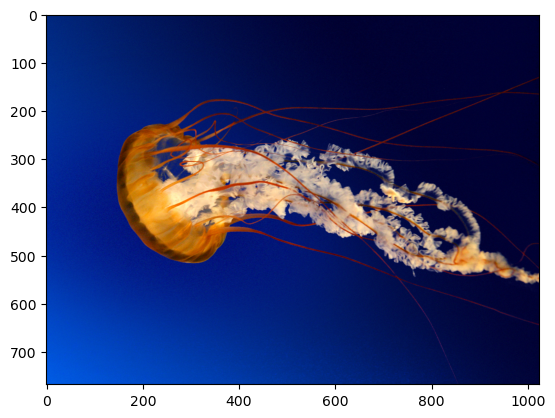

In [3]:
from xmlrpc.client import ServerProxy, Binary

# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = Binary(pimg)
print('Ping:', server.ping())
img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
plt.imshow(img_arr2)
plt.show()

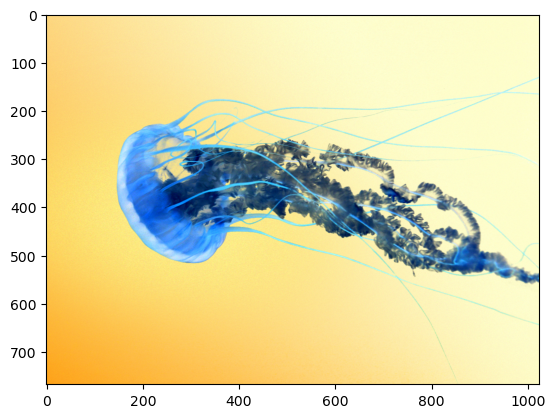

In [4]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpclib.Binary(pimg)
    
    img_bin2 = server.color_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
plt.imshow(img_arr_inv)
plt.show()

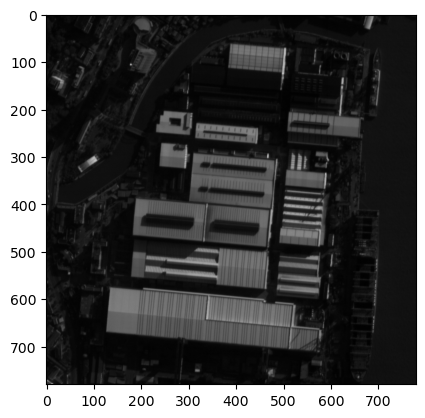

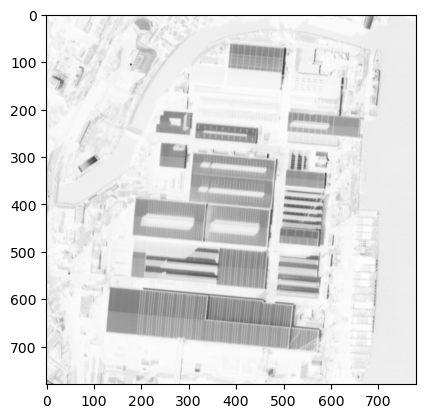

In [5]:
img = Image.open('11.bmp')
plt.imshow(img)
plt.show()

# img_arr = array(img)
img_arr = plt.imread('11.bmp')

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
plt.imshow(img_arr_inv)
plt.show()

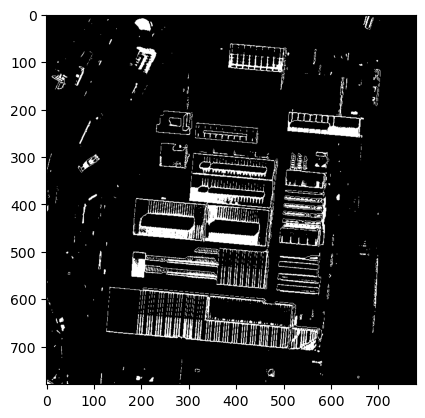

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
from xmlrpc.client import ServerProxy, Binary
import pickle
import numpy as np

def make_bin(img_arr_in, board=50):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)

    img_bin2 = server.send_back_binarization(img_bin, board)

    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr = plt.imread('Jellyfish.jpg') # ~30
img_arr = plt.imread('11.bmp') #
img_arr_bin = make_bin(img_arr, 50)

# Изображение с бинарной маской по порогу
plt.imshow(img_arr_bin)
plt.show()

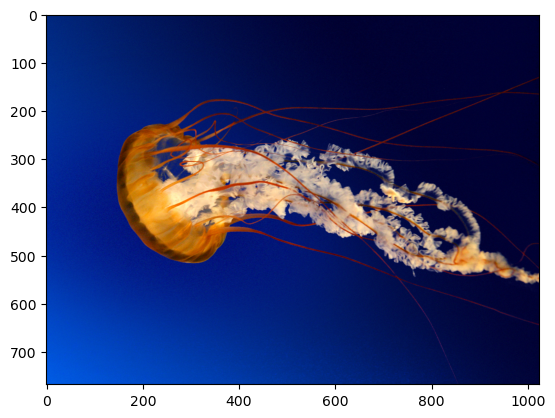

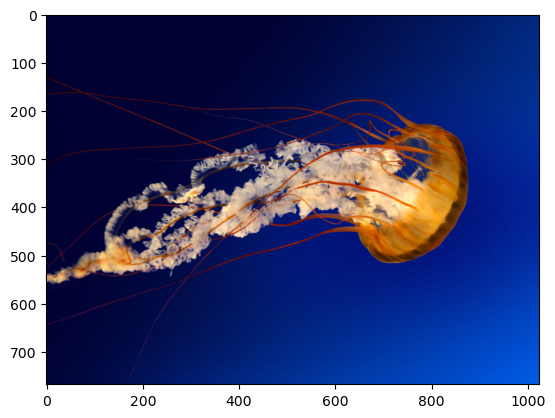

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
from xmlrpc.client import ServerProxy, Binary
import pickle
import numpy as np

def make_flip(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)

    img_bin2 = server.send_back_flip_vertical(img_bin)

    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr = plt.imread('Jellyfish.jpg') # ~30
# img_arr = plt.imread('11.bmp') #

plt.imshow(img_arr)
plt.show()

img_arr_flip = make_flip(img_arr)

# Изображение с разворотом по вертикали
plt.imshow(img_arr_flip)
plt.show()

In [8]:
print(server.black_list_check(u'Петров'))
print(server.black_list_check(u'Примеров'))


Петров: bad_boy
Примеров: good_boy


In [11]:
print(server.black_list_check_full("Иванов Иван Иванович", "22.03.1989"))

Иванов Иван Иванович (22.03.1989): bad_boy
